# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'logs')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','Neurons')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *


In [13]:
df = log_files_qc(LOGS_PATH)


Total of 14 files were read.
Before dup handeling  (157248, 20)
After duplication removal #1: (137837, 21)
After duplication removal #2: (136396, 21)


## validate folder structure and files existence

In [5]:
# choose batches
batches = [f'batch{i}' for i in range (3,10)]# + ['batch7_16bit','batch8_16bit','batch9_16bit']
#batches=['batch7']

### Raw Files

In [92]:

root_directory_raw = os.path.join(MOMAPS_HOME, 'input', 'images', 'raw', 'SpinningDisk')

batches_raw = [batch.replace("_16bit","") for batch in batches]
raws = run_validate_folder_structure(root_directory_raw, False, panels, markers,PLOT_PATH,marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches_raw)

batch3
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/FUSHomozygous/panelA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/FUSHomozygous/panelB
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/FUSHomozygous/panelC
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TDP43/panelA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TDP43/panelB
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TDP43/panelC
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TBK1/panelA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TBK1/panelB
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TBK1/panelC
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDis

/home/labs/hornsteinlab/Collaboration/MOmaps/src/common/lib/images_qc.py:355: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  colored_df['Rep'] = 'white'


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7efdbddff8c0> (for post_execute):


KeyboardInterrupt: 

### Processed

batch3
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/G3BP1
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/NONO
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/SQSTM1
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/KIF5A
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/TDP43
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/FMRP
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/PURA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batc

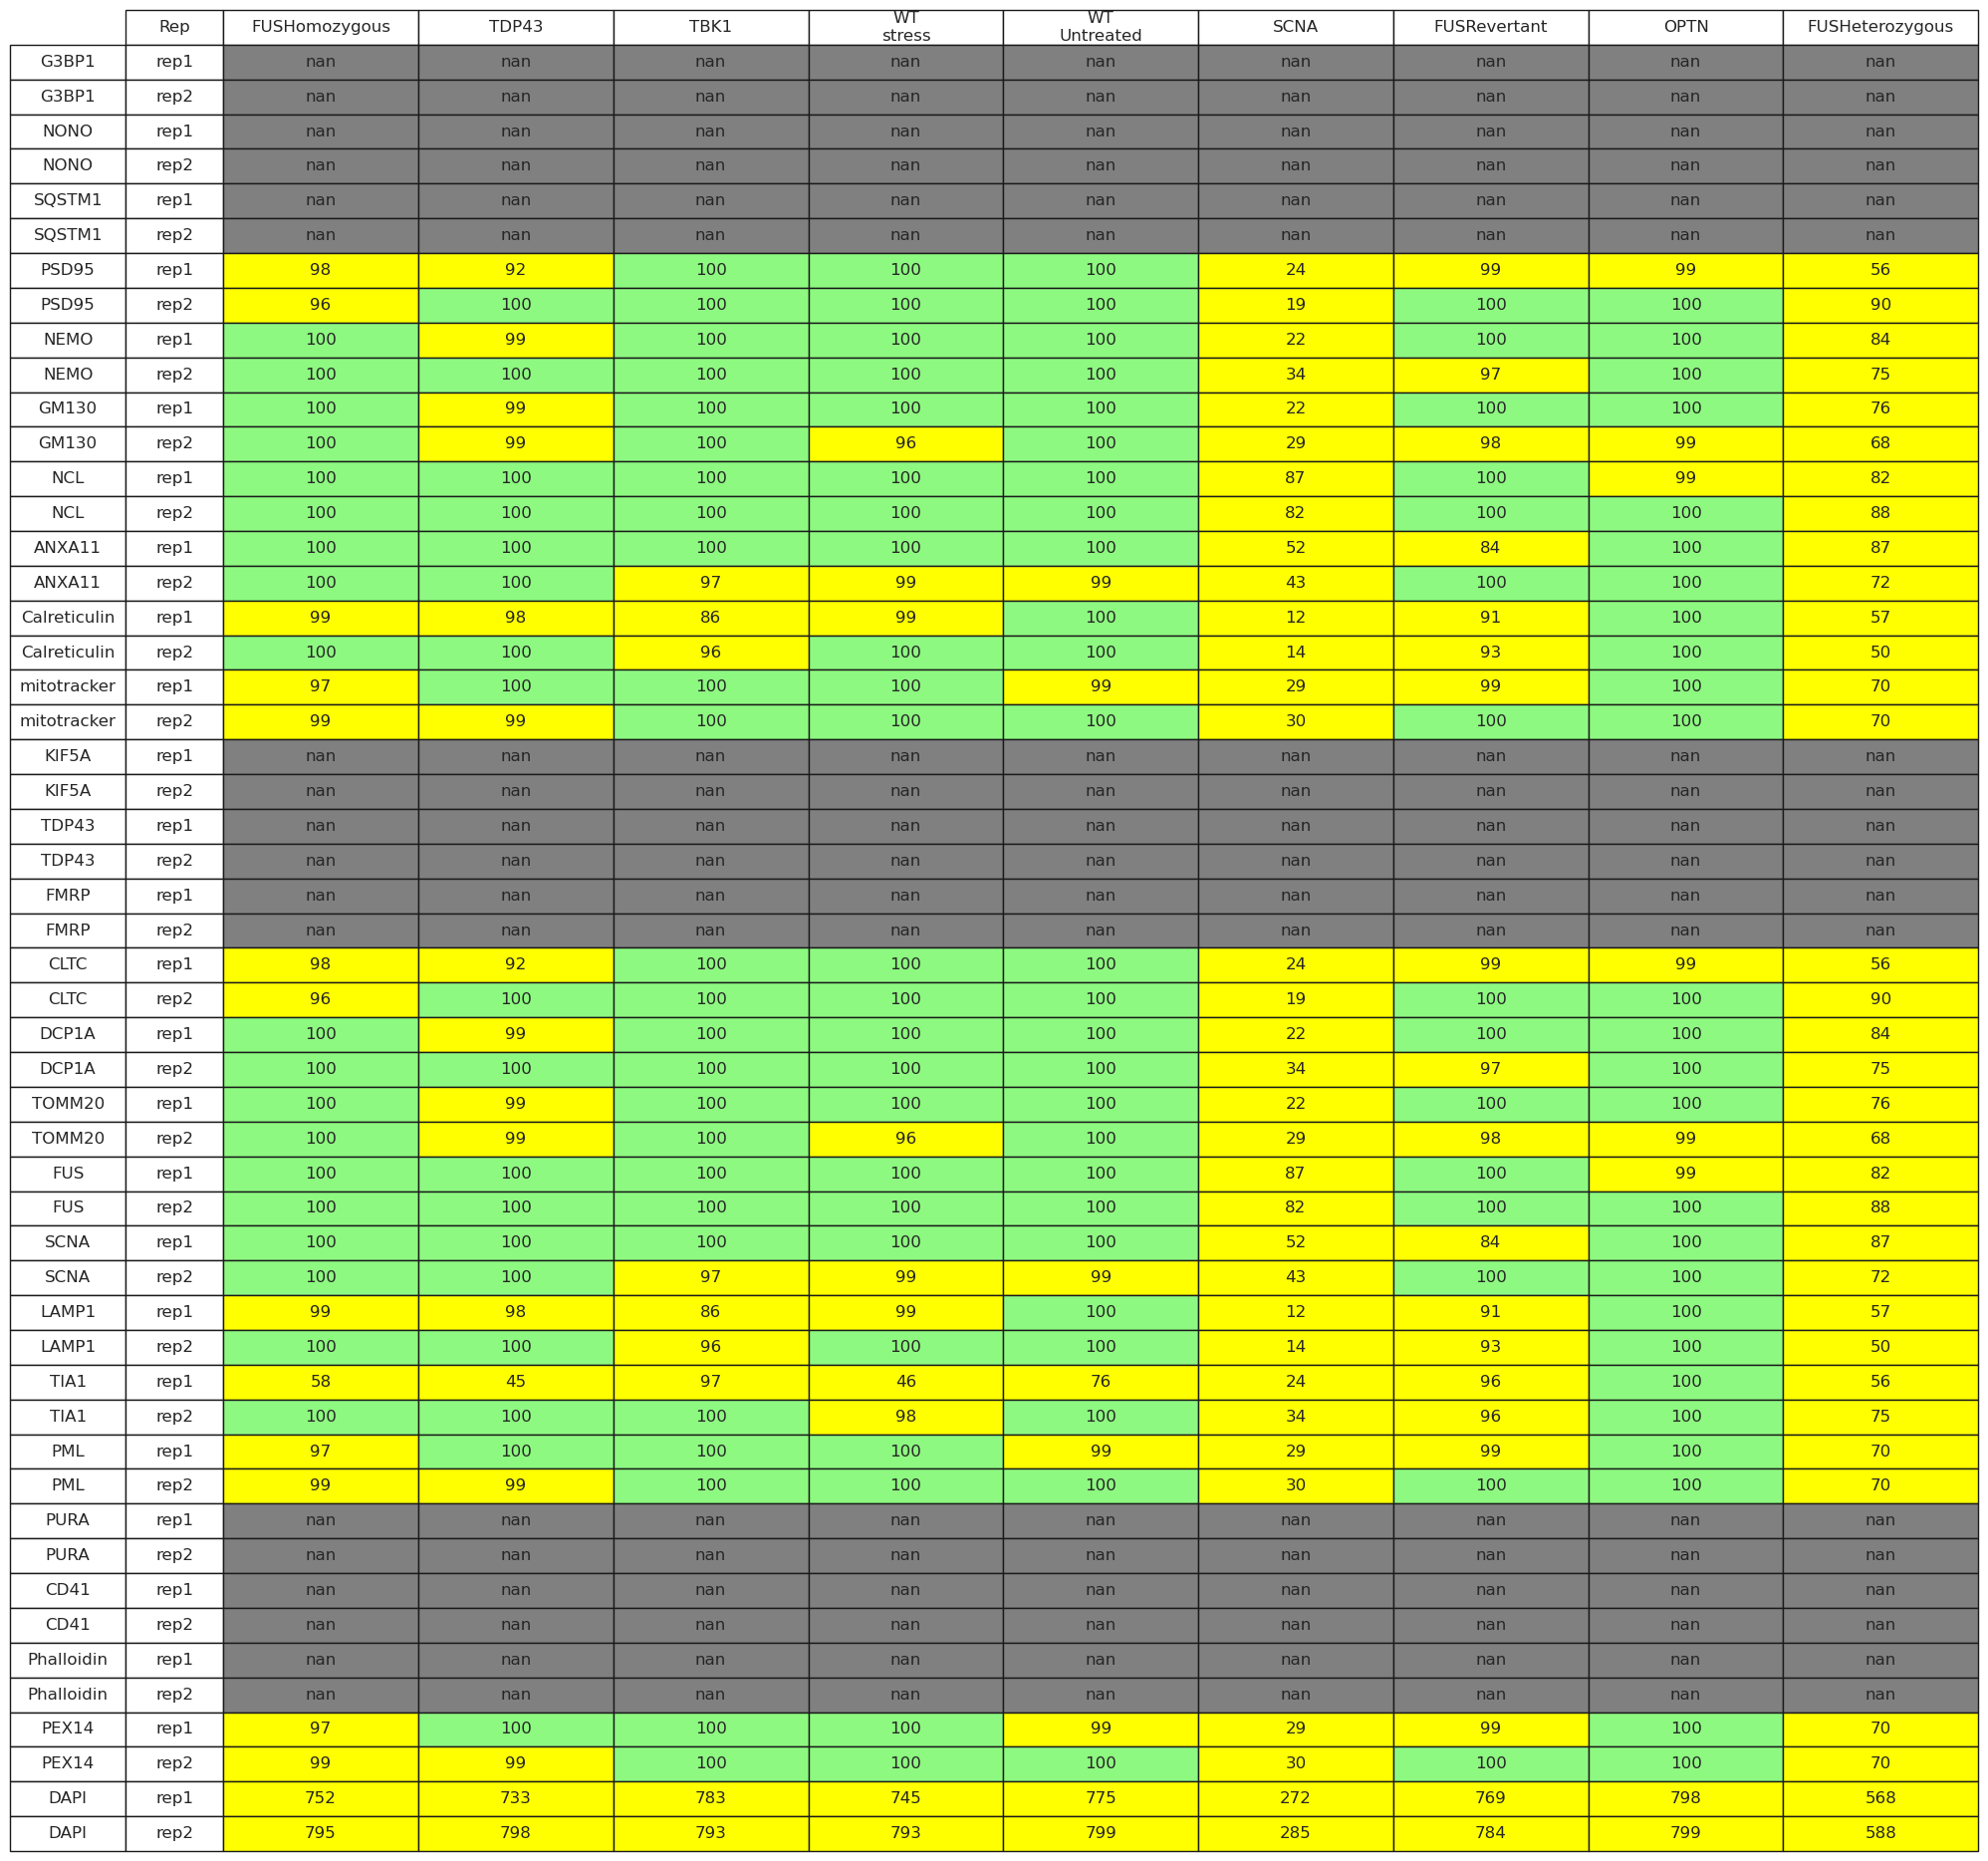

In [67]:
root_directory_proc = os.path.join(MOMAPS_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk')
procs = run_validate_folder_structure(root_directory_proc, True, panels, markers,PLOT_PATH,marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches_raw)

### Difference between Raw and Processed

batch3


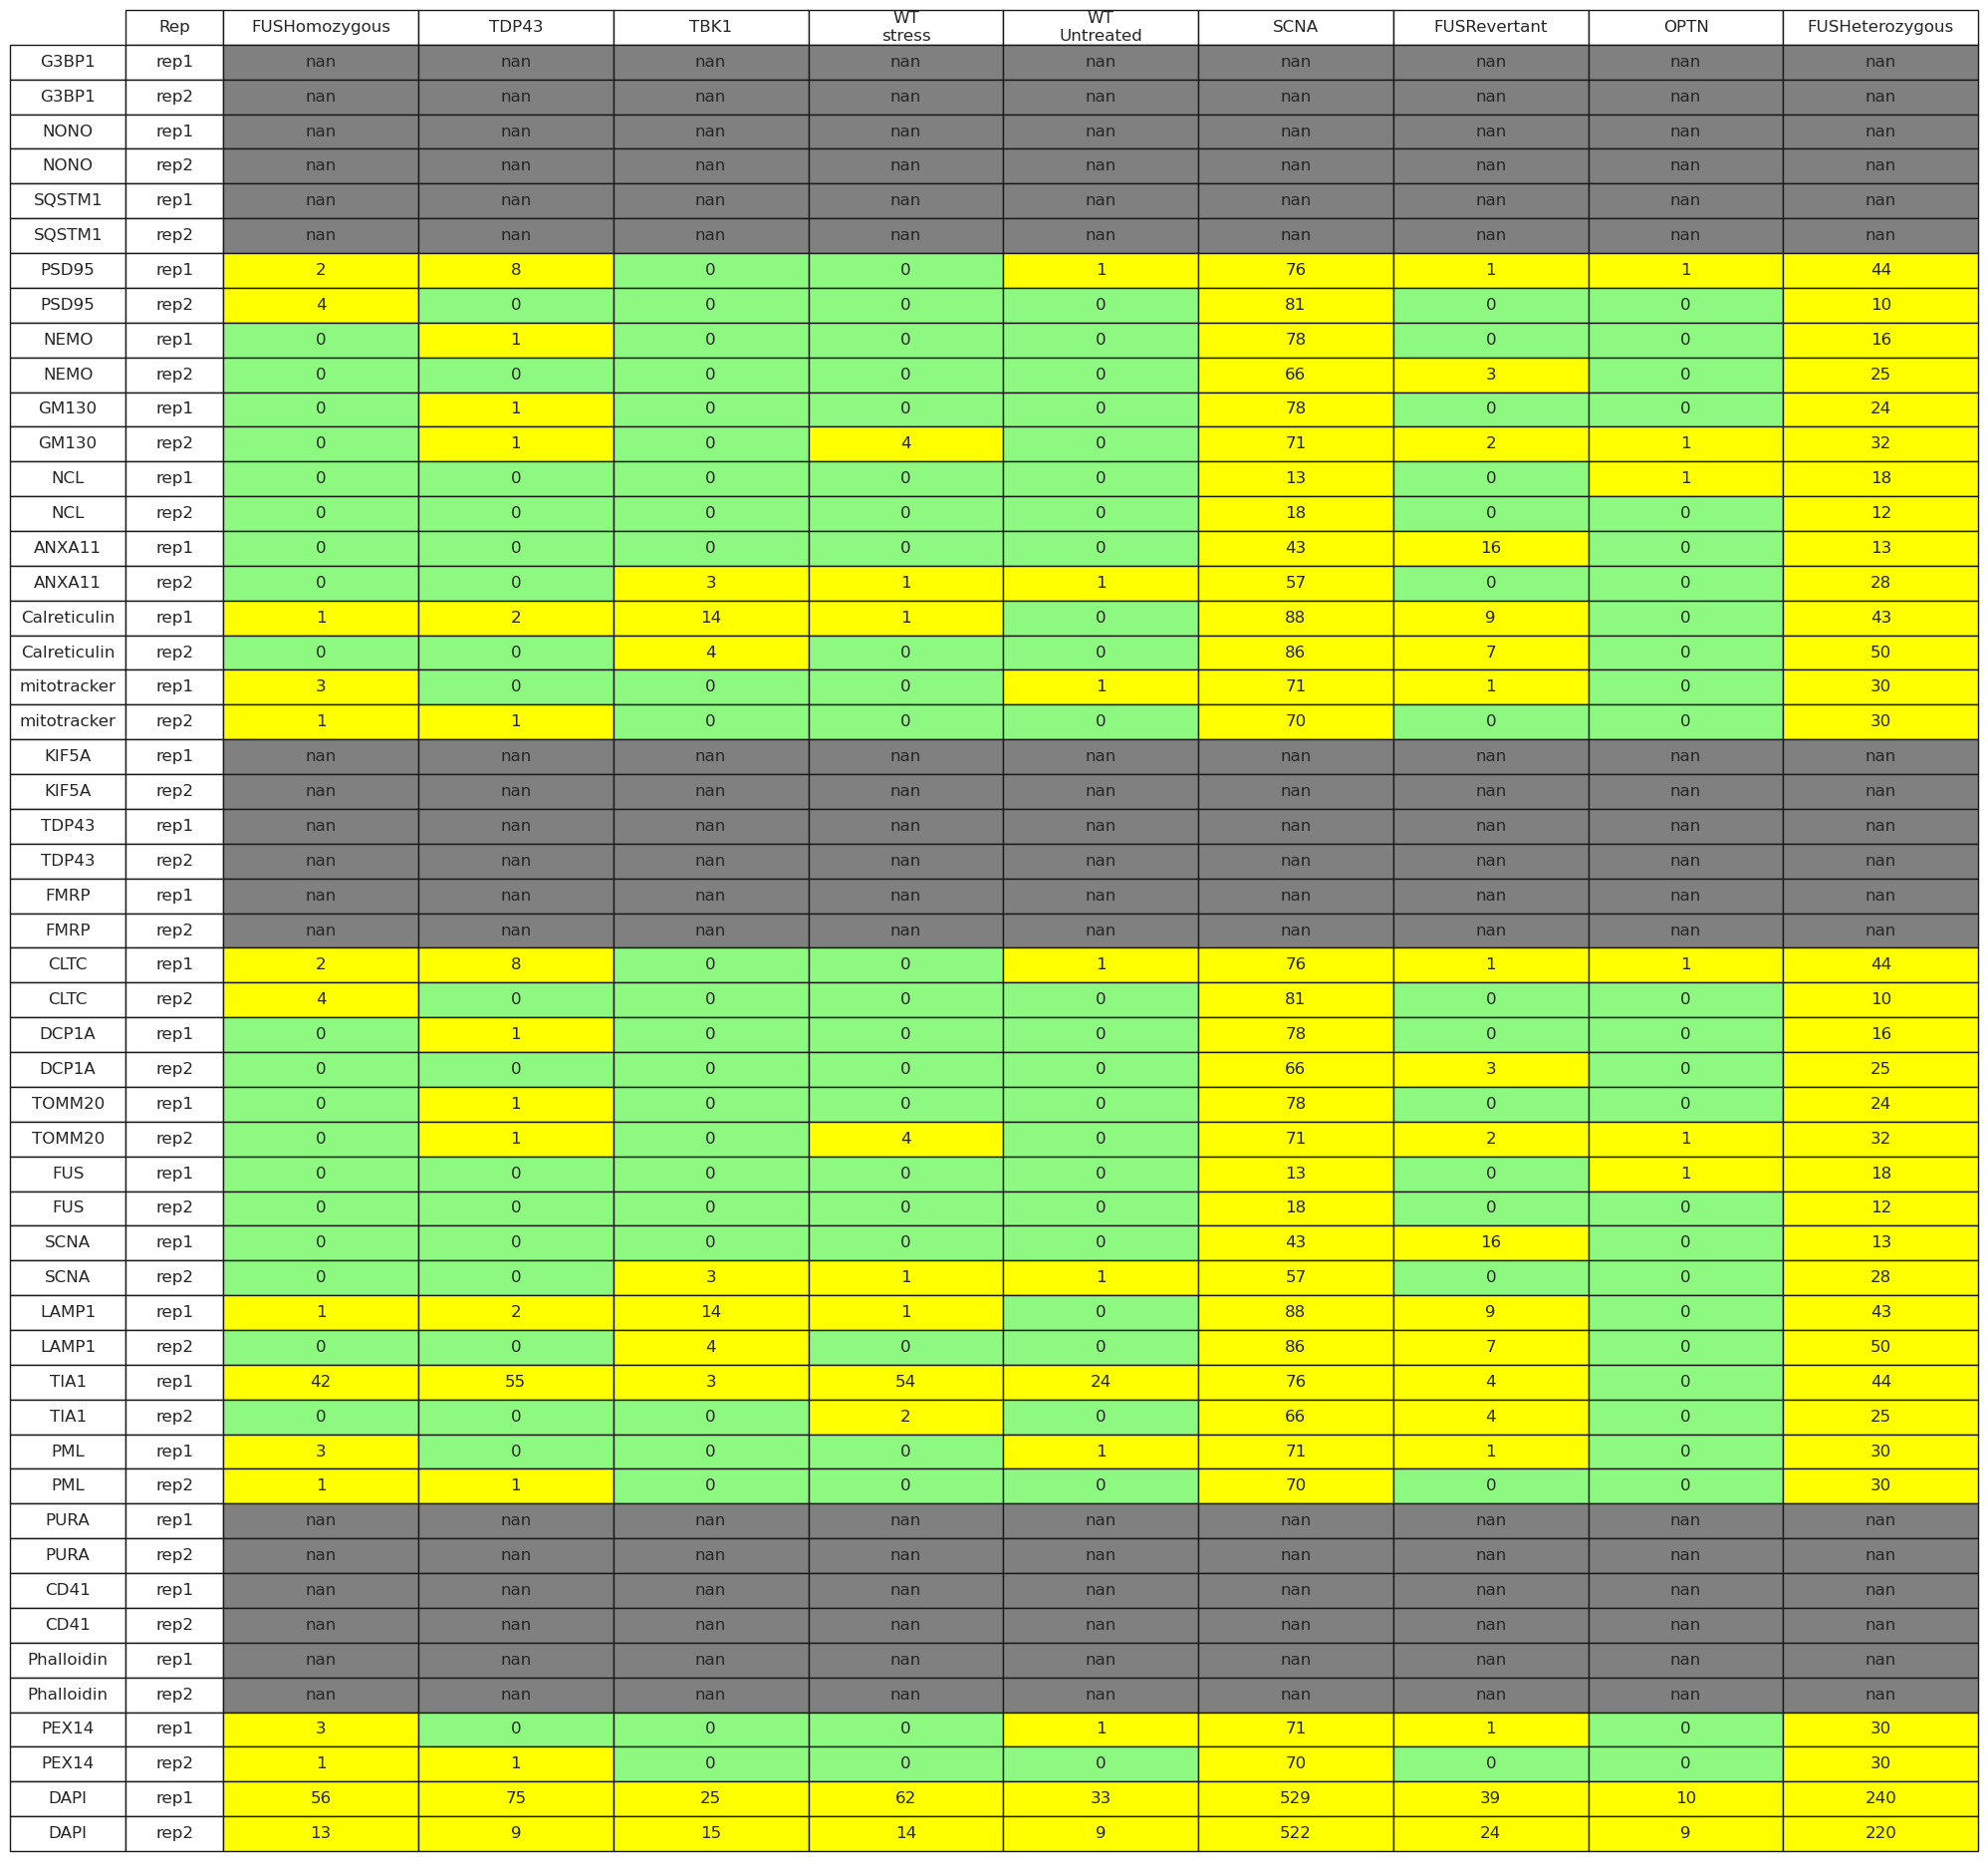

In [69]:
display_diff(batches, raws, procs, PLOT_PATH)

In [53]:
#for batch in list(range(3,9)) + ['7_16bit','8_16bit','9_16bit']: #problem with batch9: files that are 1 bytes!!!  
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, sample_size_per_markers=200, num_markers=26)
    print(f'{batch} var: ',var)

batch6 var:  0.012078527873032291
batch6 var:  0.012074647335675794



# <font color='red'>Number of sites in each batch and cell line </font>


In [12]:
np.unique(df_no_per.cell_line_cond)

array(['FUSHeterozygous Untreated', 'FUSHomozygous Untreated',
       'FUSRevertant Untreated', 'OPTN Untreated', 'SCNA Untreated',
       'TBK1 Untreated', 'TDP43 Untreated', 'WT Untreated', 'WT stress'],
      dtype=object)

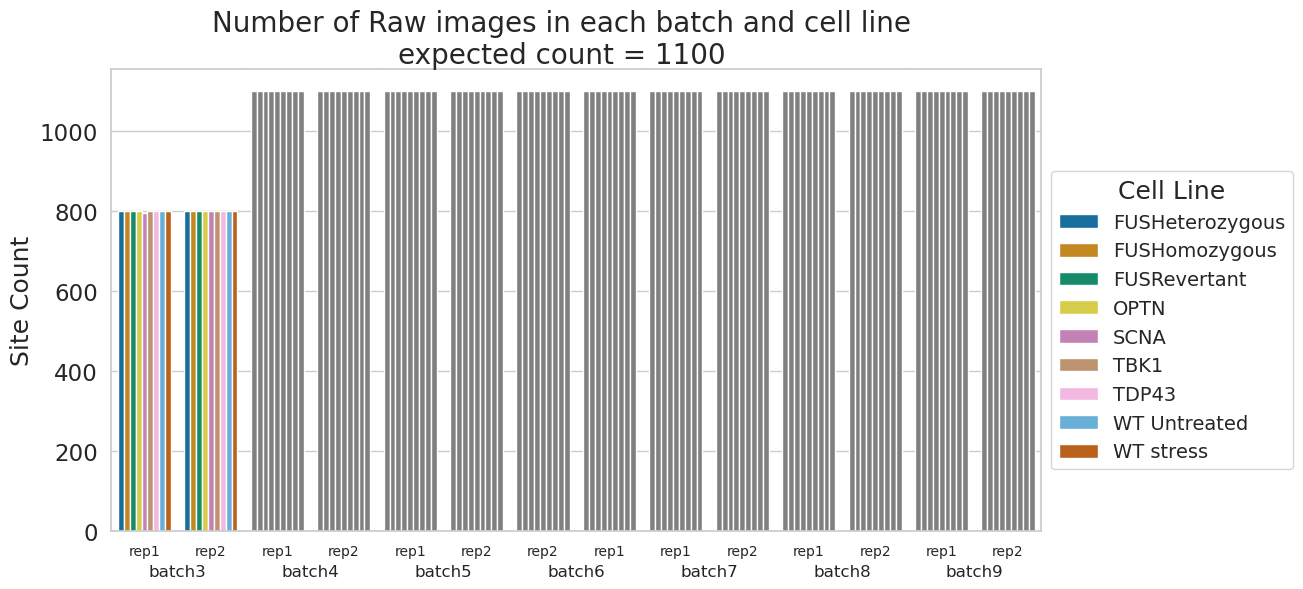

In [19]:
df_no_per = df[df.batch!='Perturbations']
plot_sites_count(df_no_per, expected_raw, lines_order, custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

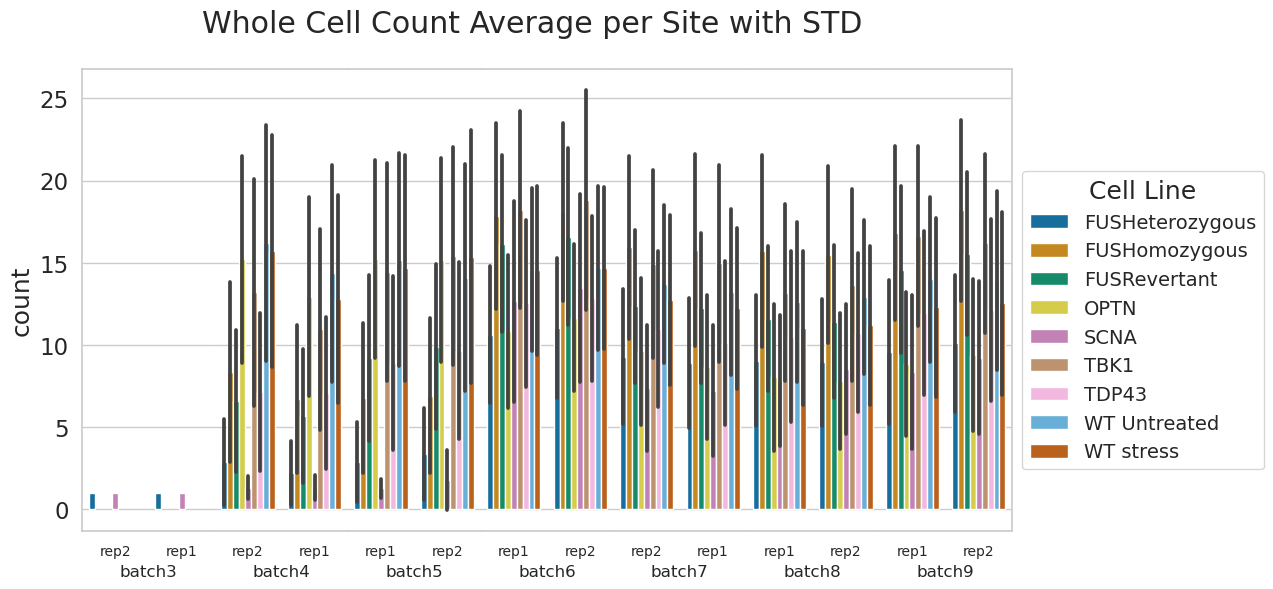

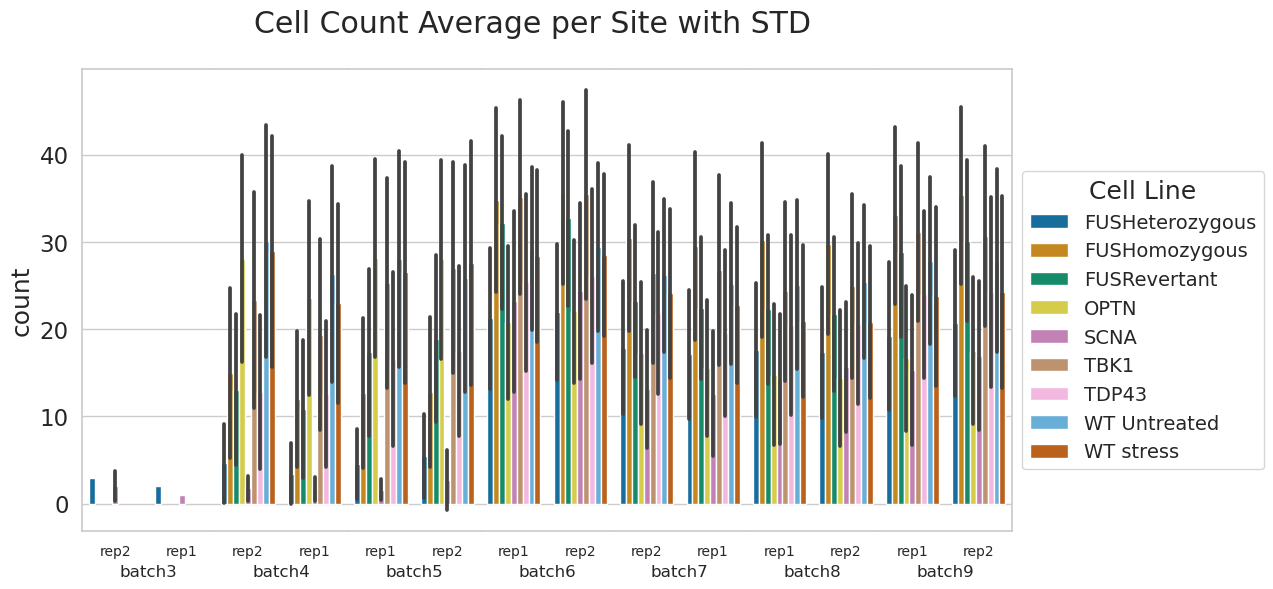

In [72]:
df_no_empty_sites = df_no_per[df_no_per.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, lines_order, custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, lines_order, custom_palette, whole_cells=False)
# can add norm=True to norm by max


# <font color='blue'>number of valid tiles per image (site)</font>


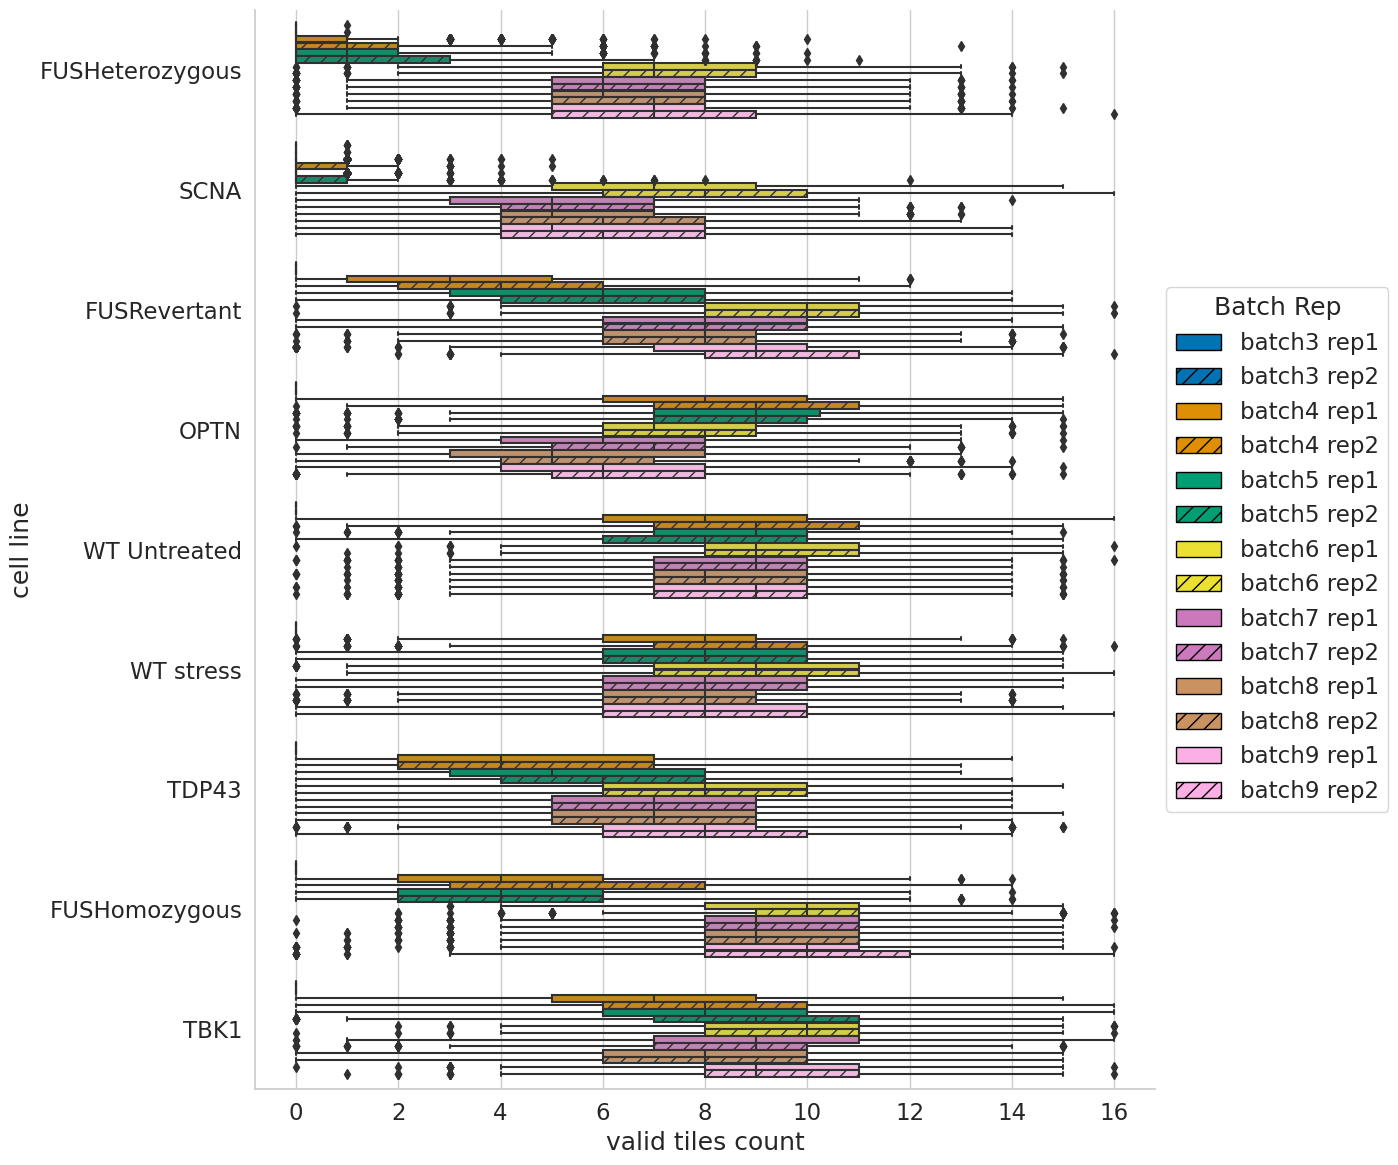

In [77]:
plot_n_valid_tiles_count(df_no_per, custom_palette,reps, batch_min=3, batch_max=9)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


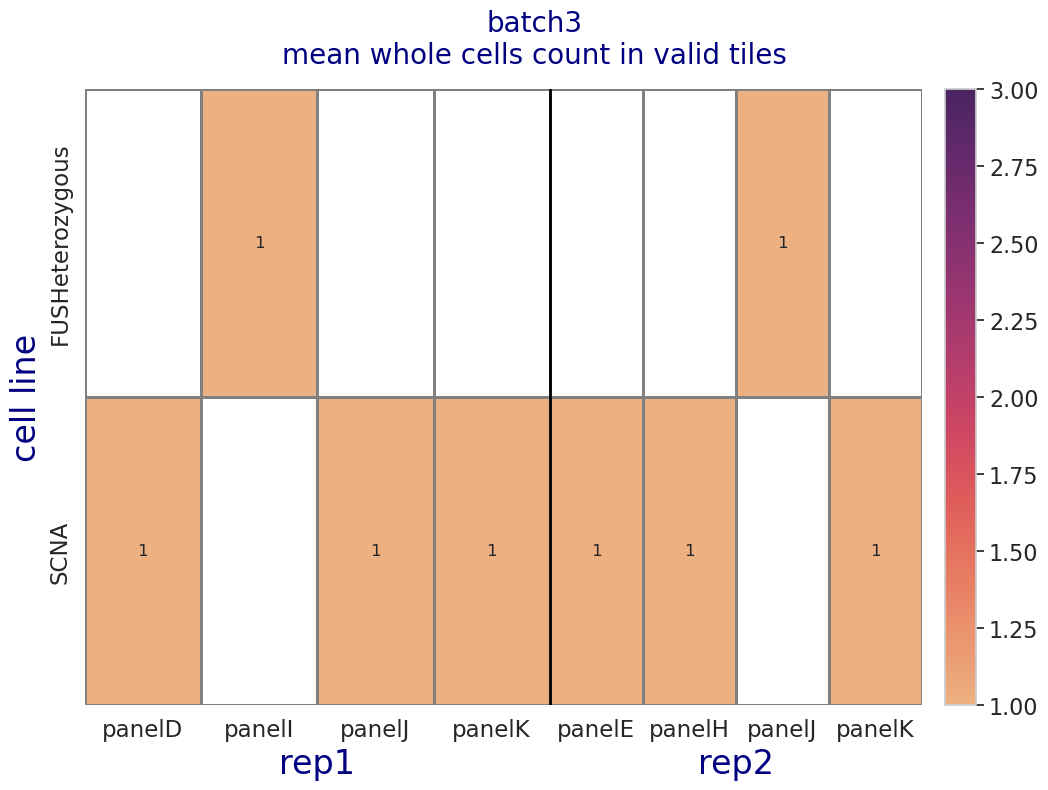

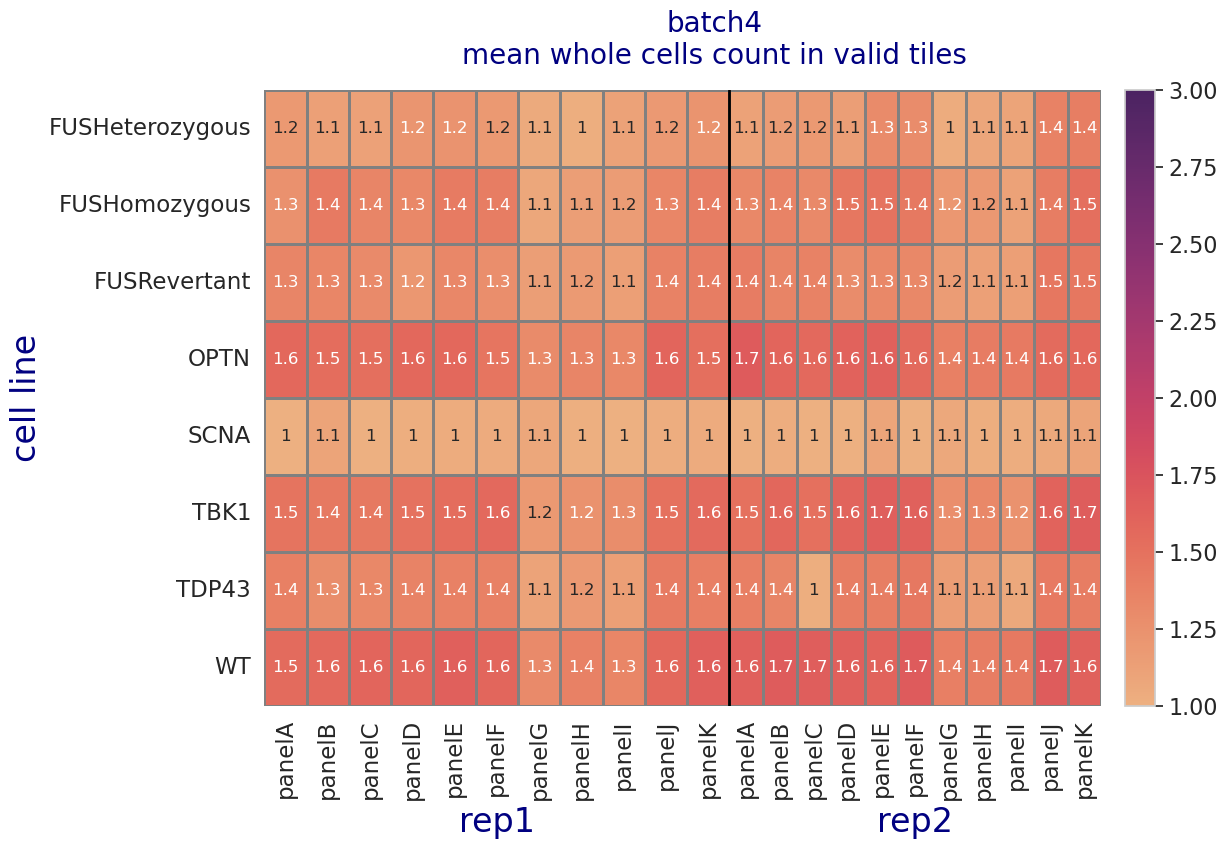

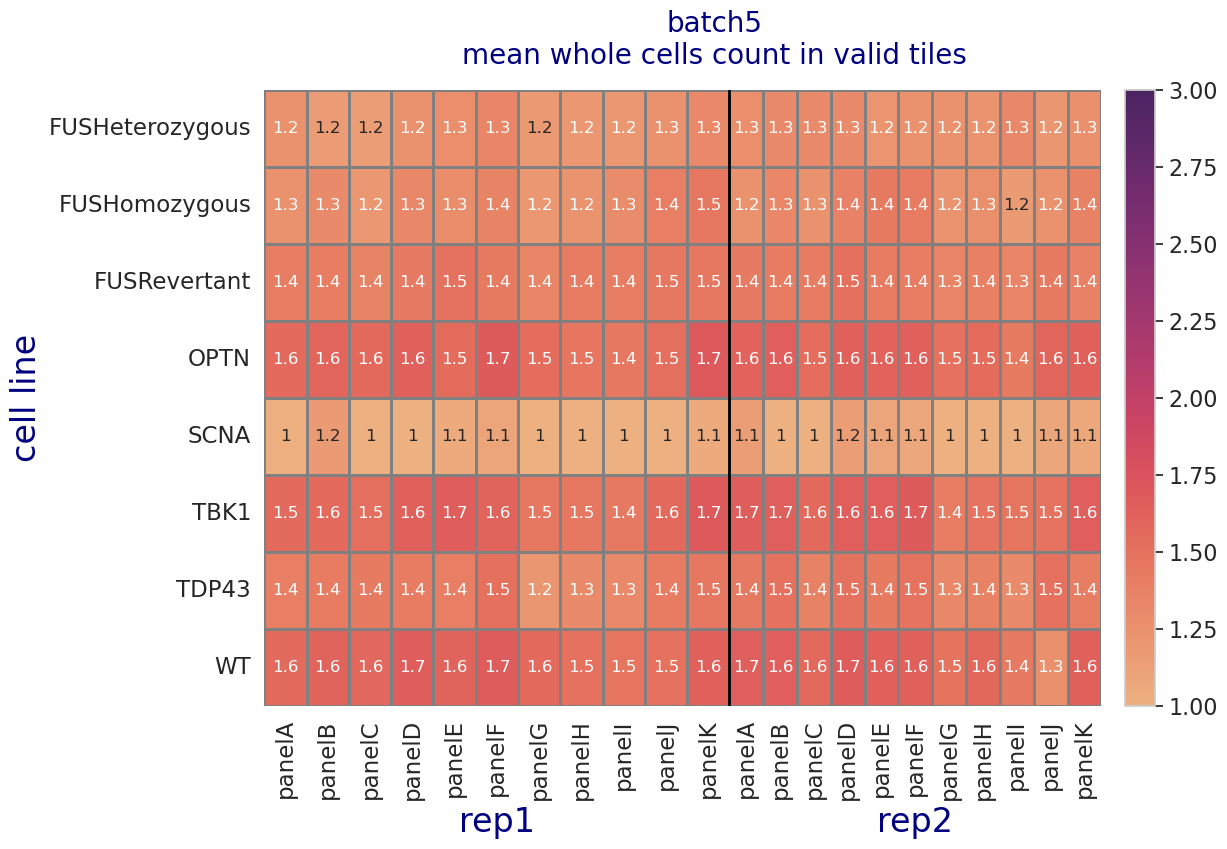

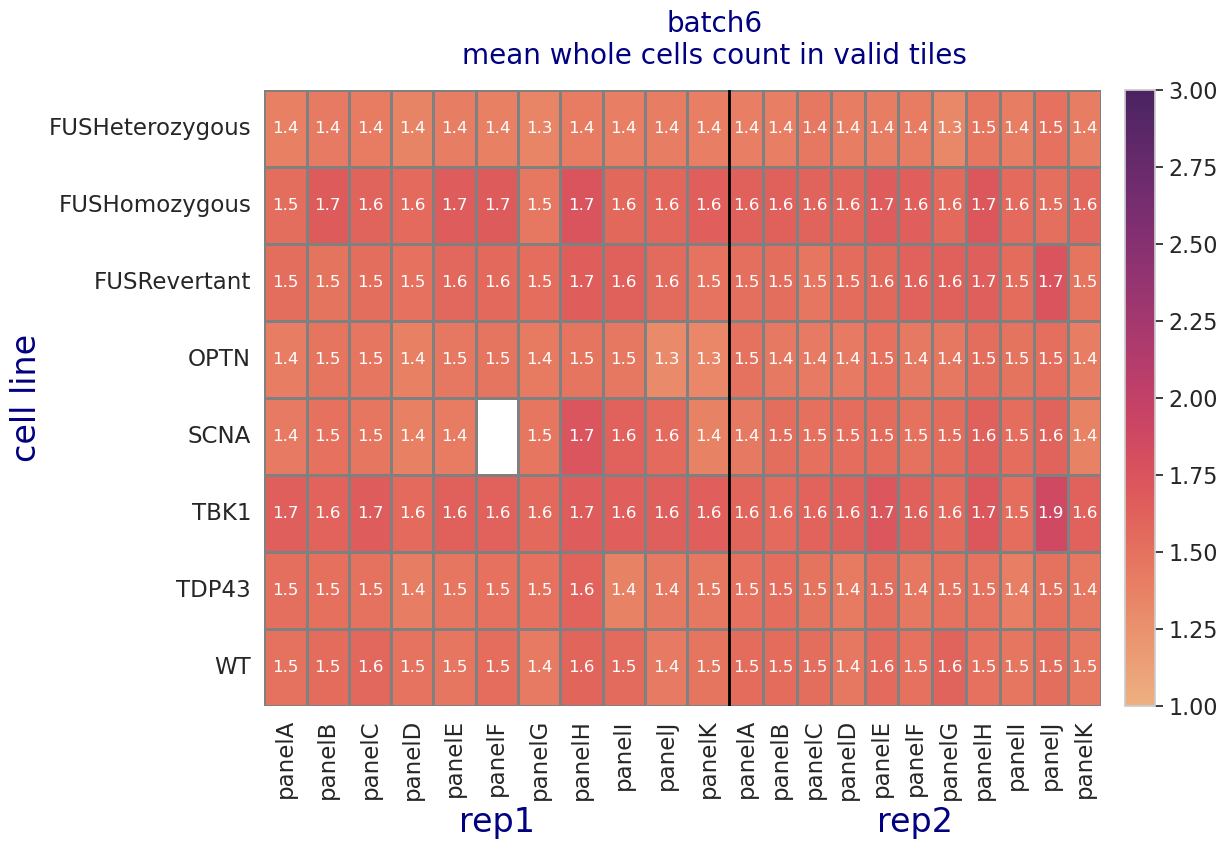

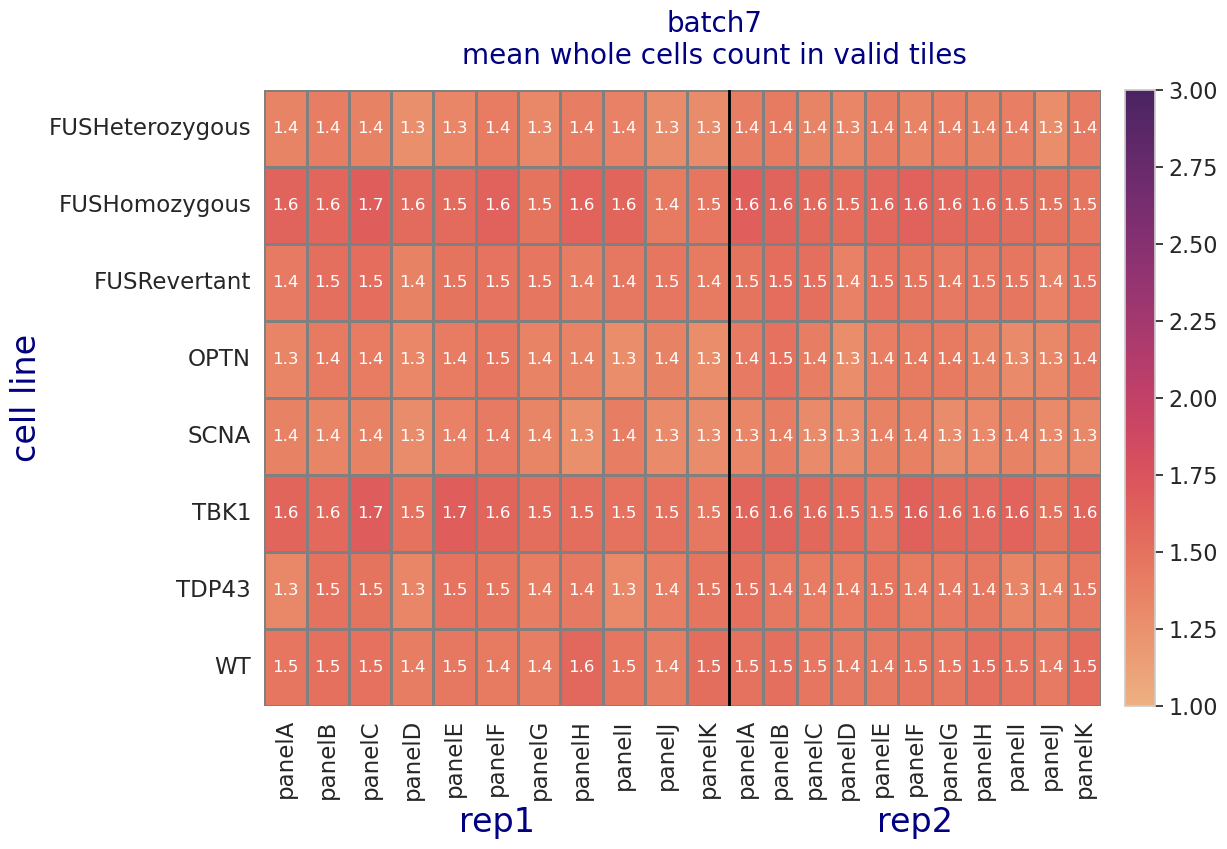

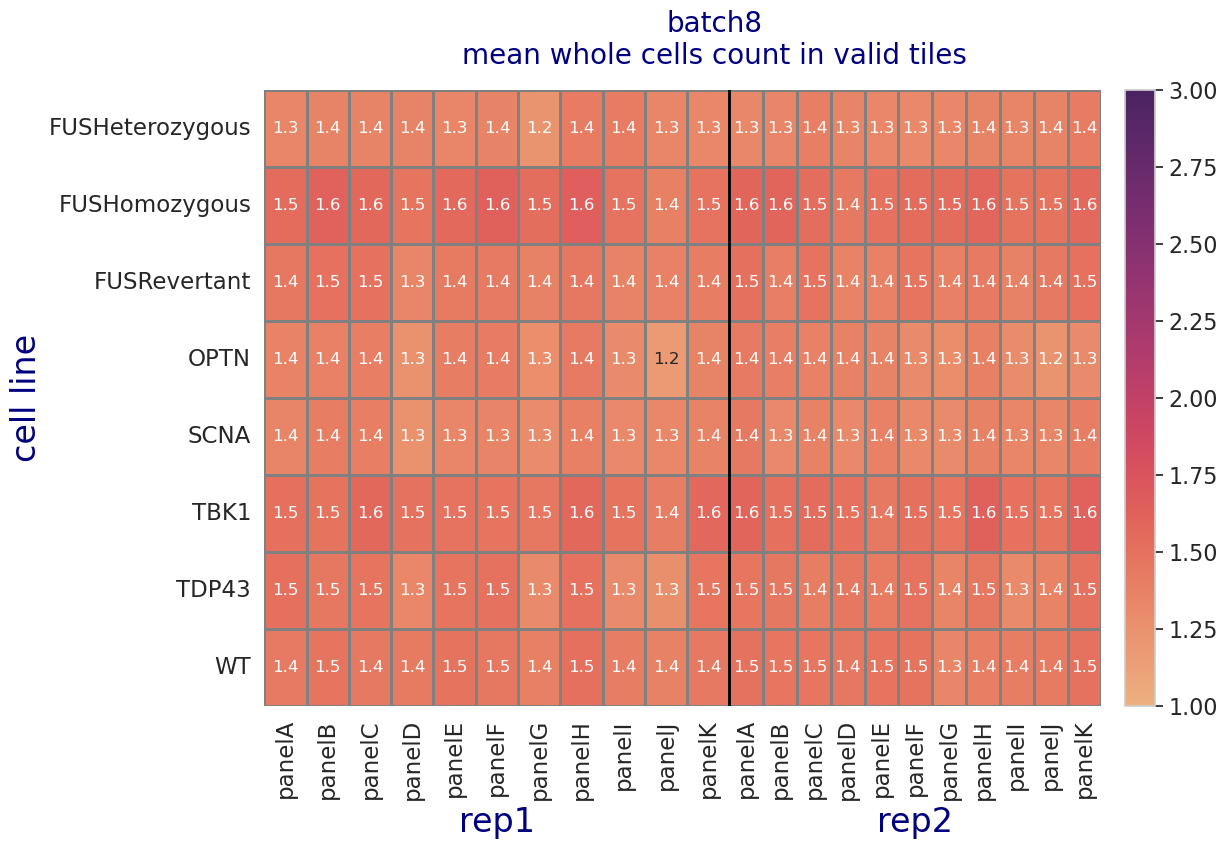

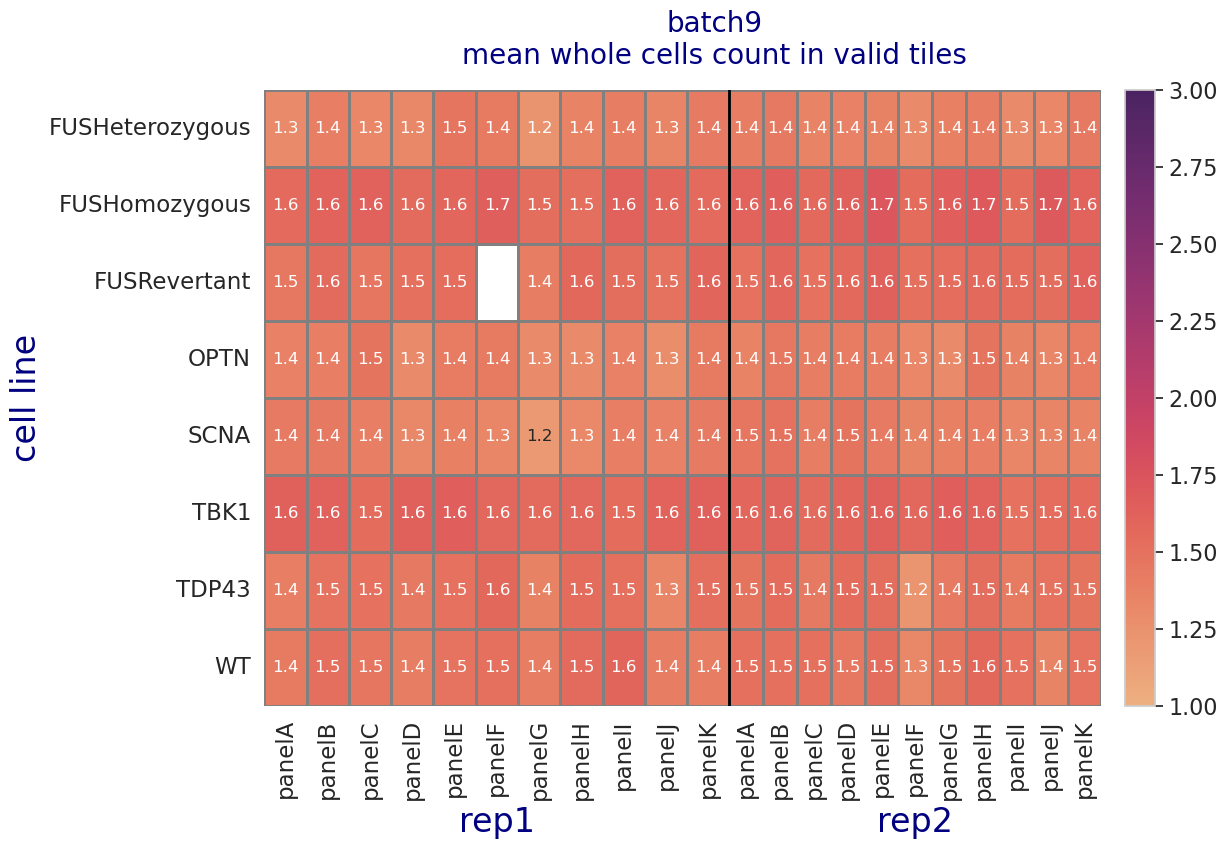

In [79]:
plot_hm(df_no_per, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

batch7


[sample_images_all_markers_all_lines]: input_dir_batch:/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch7, _sample_size_per_markers:10, _num_markers:72
sampled_images: 720 sampled_markers: 72
sampled_images: 720 sampled_markers: 72
sampled_images: 720 sampled_markers: 72
sampled_images: 1440 sampled_markers: 144
sampled_images: 720 sampled_markers: 72
sampled_images: 720 sampled_markers: 72
sampled_images: 720 sampled_markers: 72
sampled_images: 720 sampled_markers: 72


[sample_images_all_markers_all_lines]: input_dir_batch:/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch7, _sample_size_per_markers:20, _num_markers:26
sampled_images: 520 sampled_markers: 26
sampled_images: 520 sampled_markers: 26
sampled_images: 520 sampled_markers: 26
sampled_images: 1040 sampled_markers: 52
sampled_images: 520 sampled_markers: 26
sampled_images: 520 sampled_markers: 26
sampled_images: 520 sampled_markers: 26
sampled_i

/home/labs/hornsteinlab/Collaboration/MOmaps/src/common/lib/images_qc.py:786: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


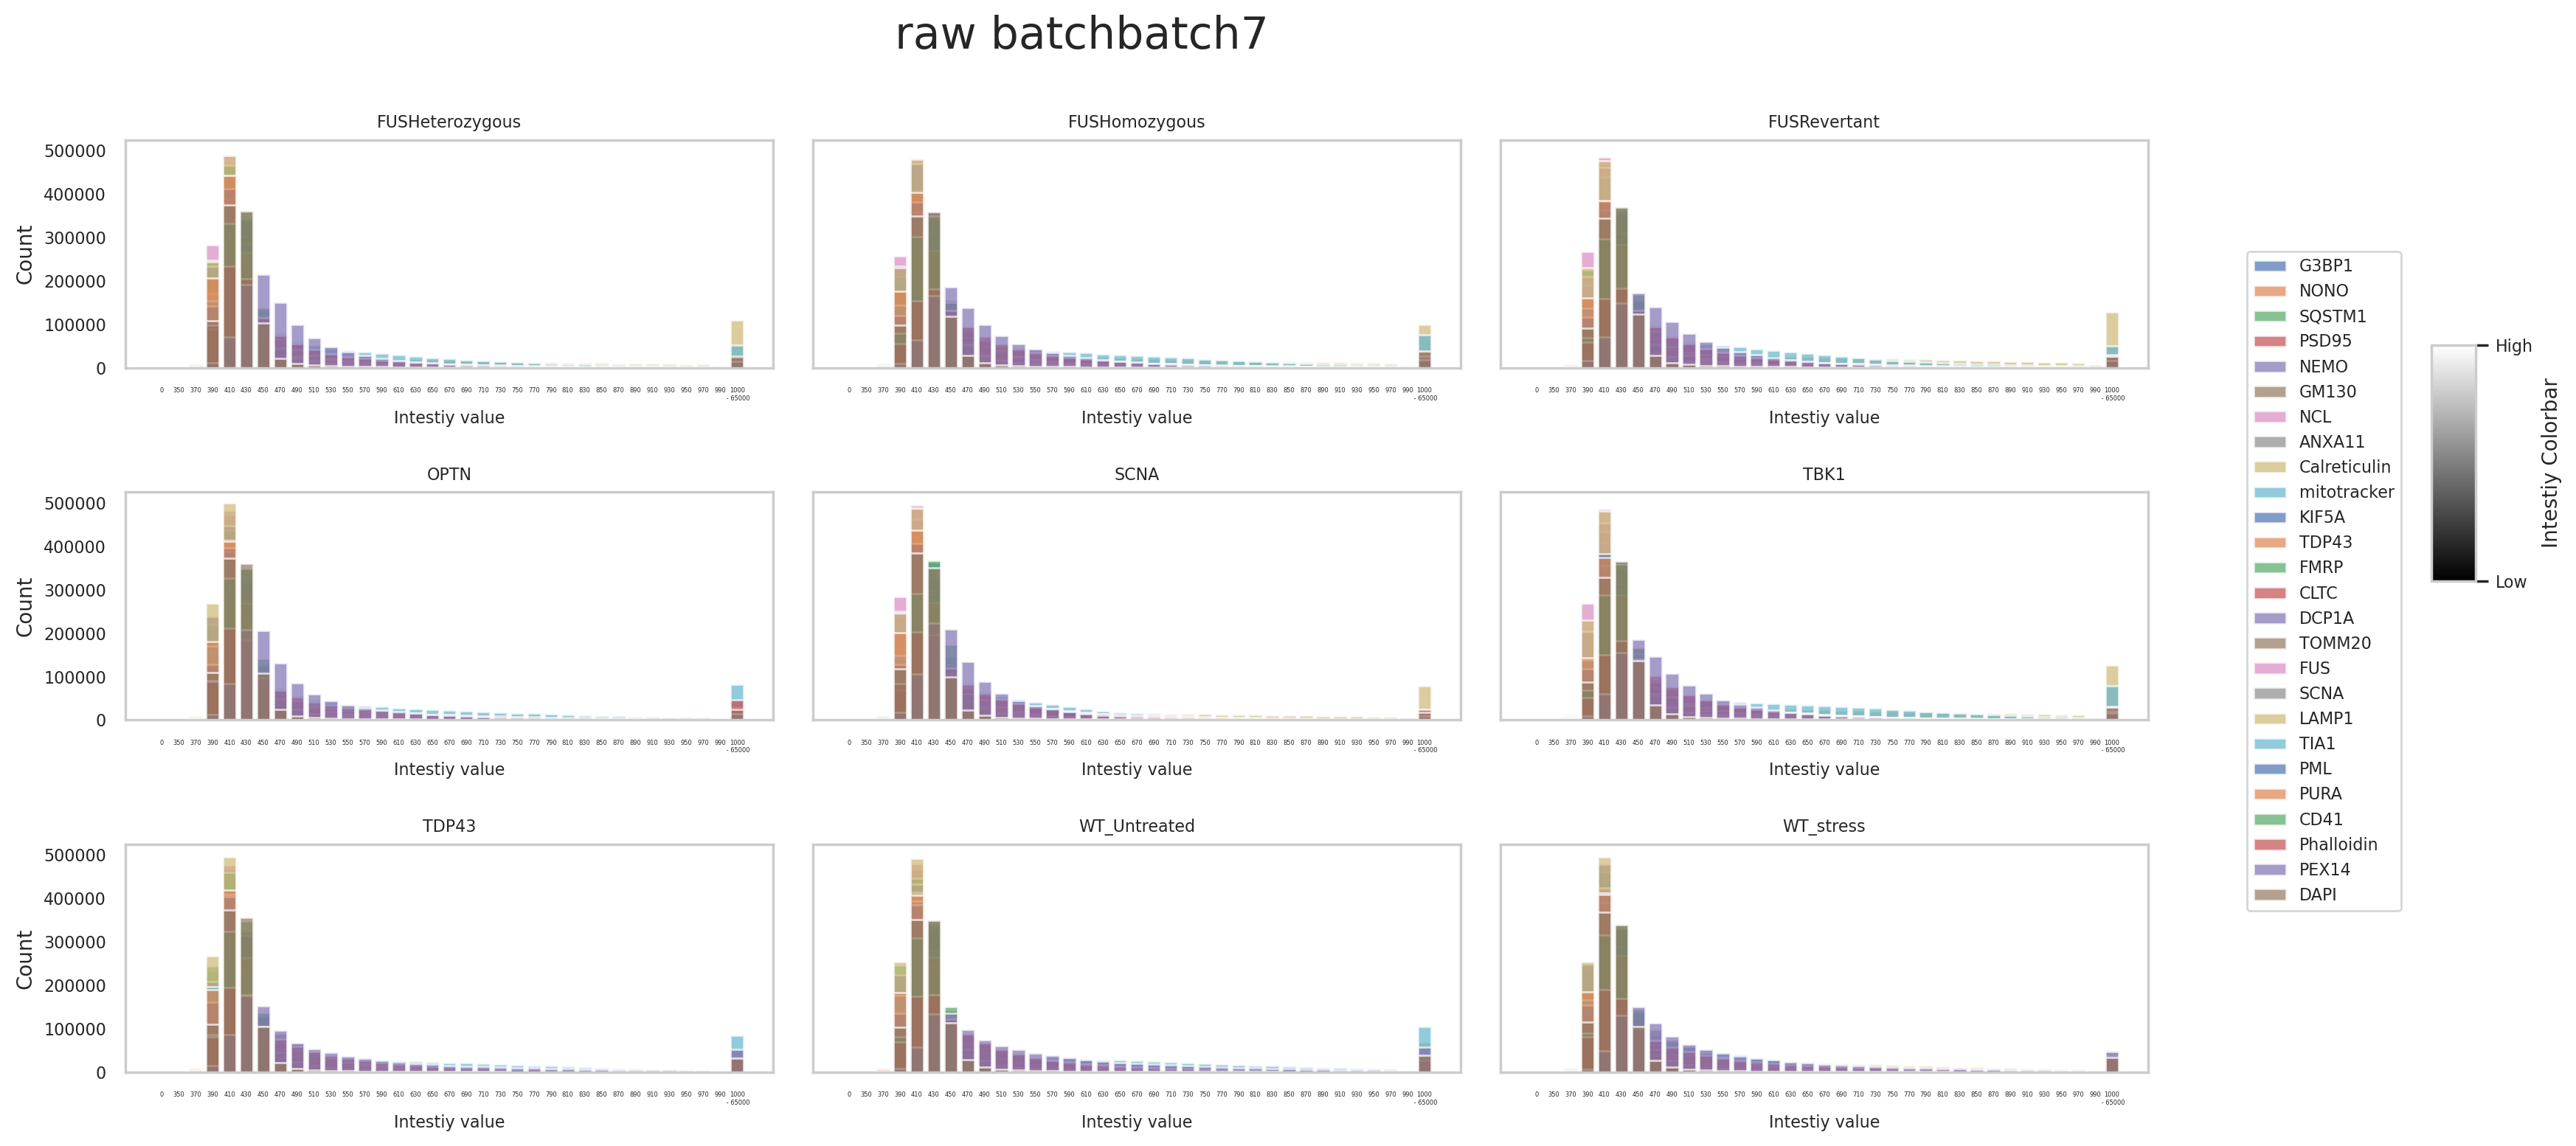

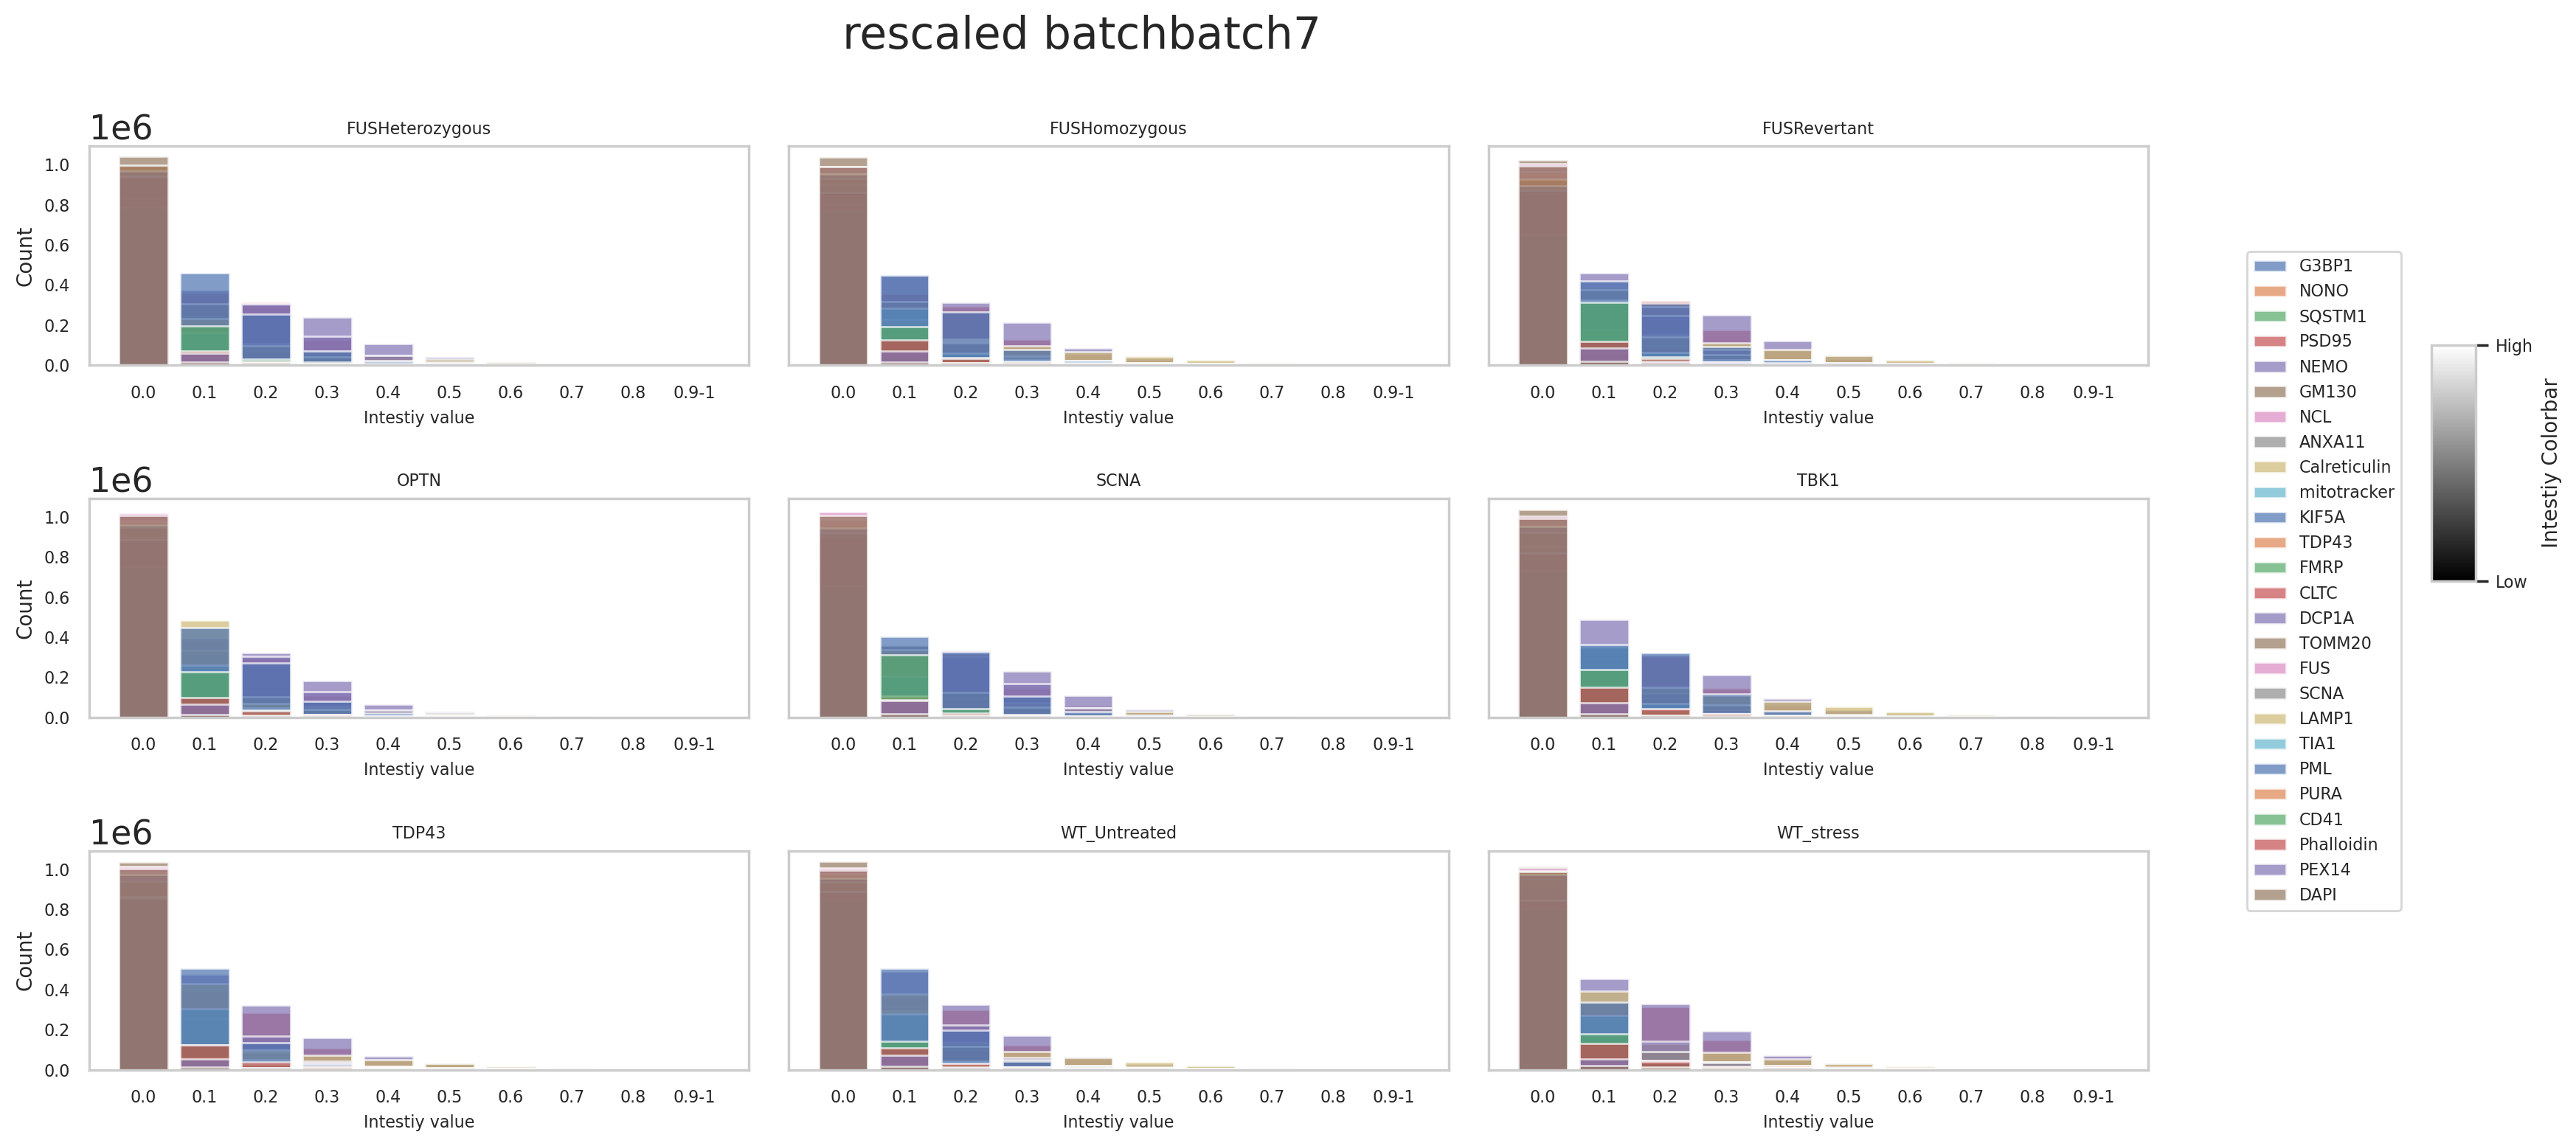

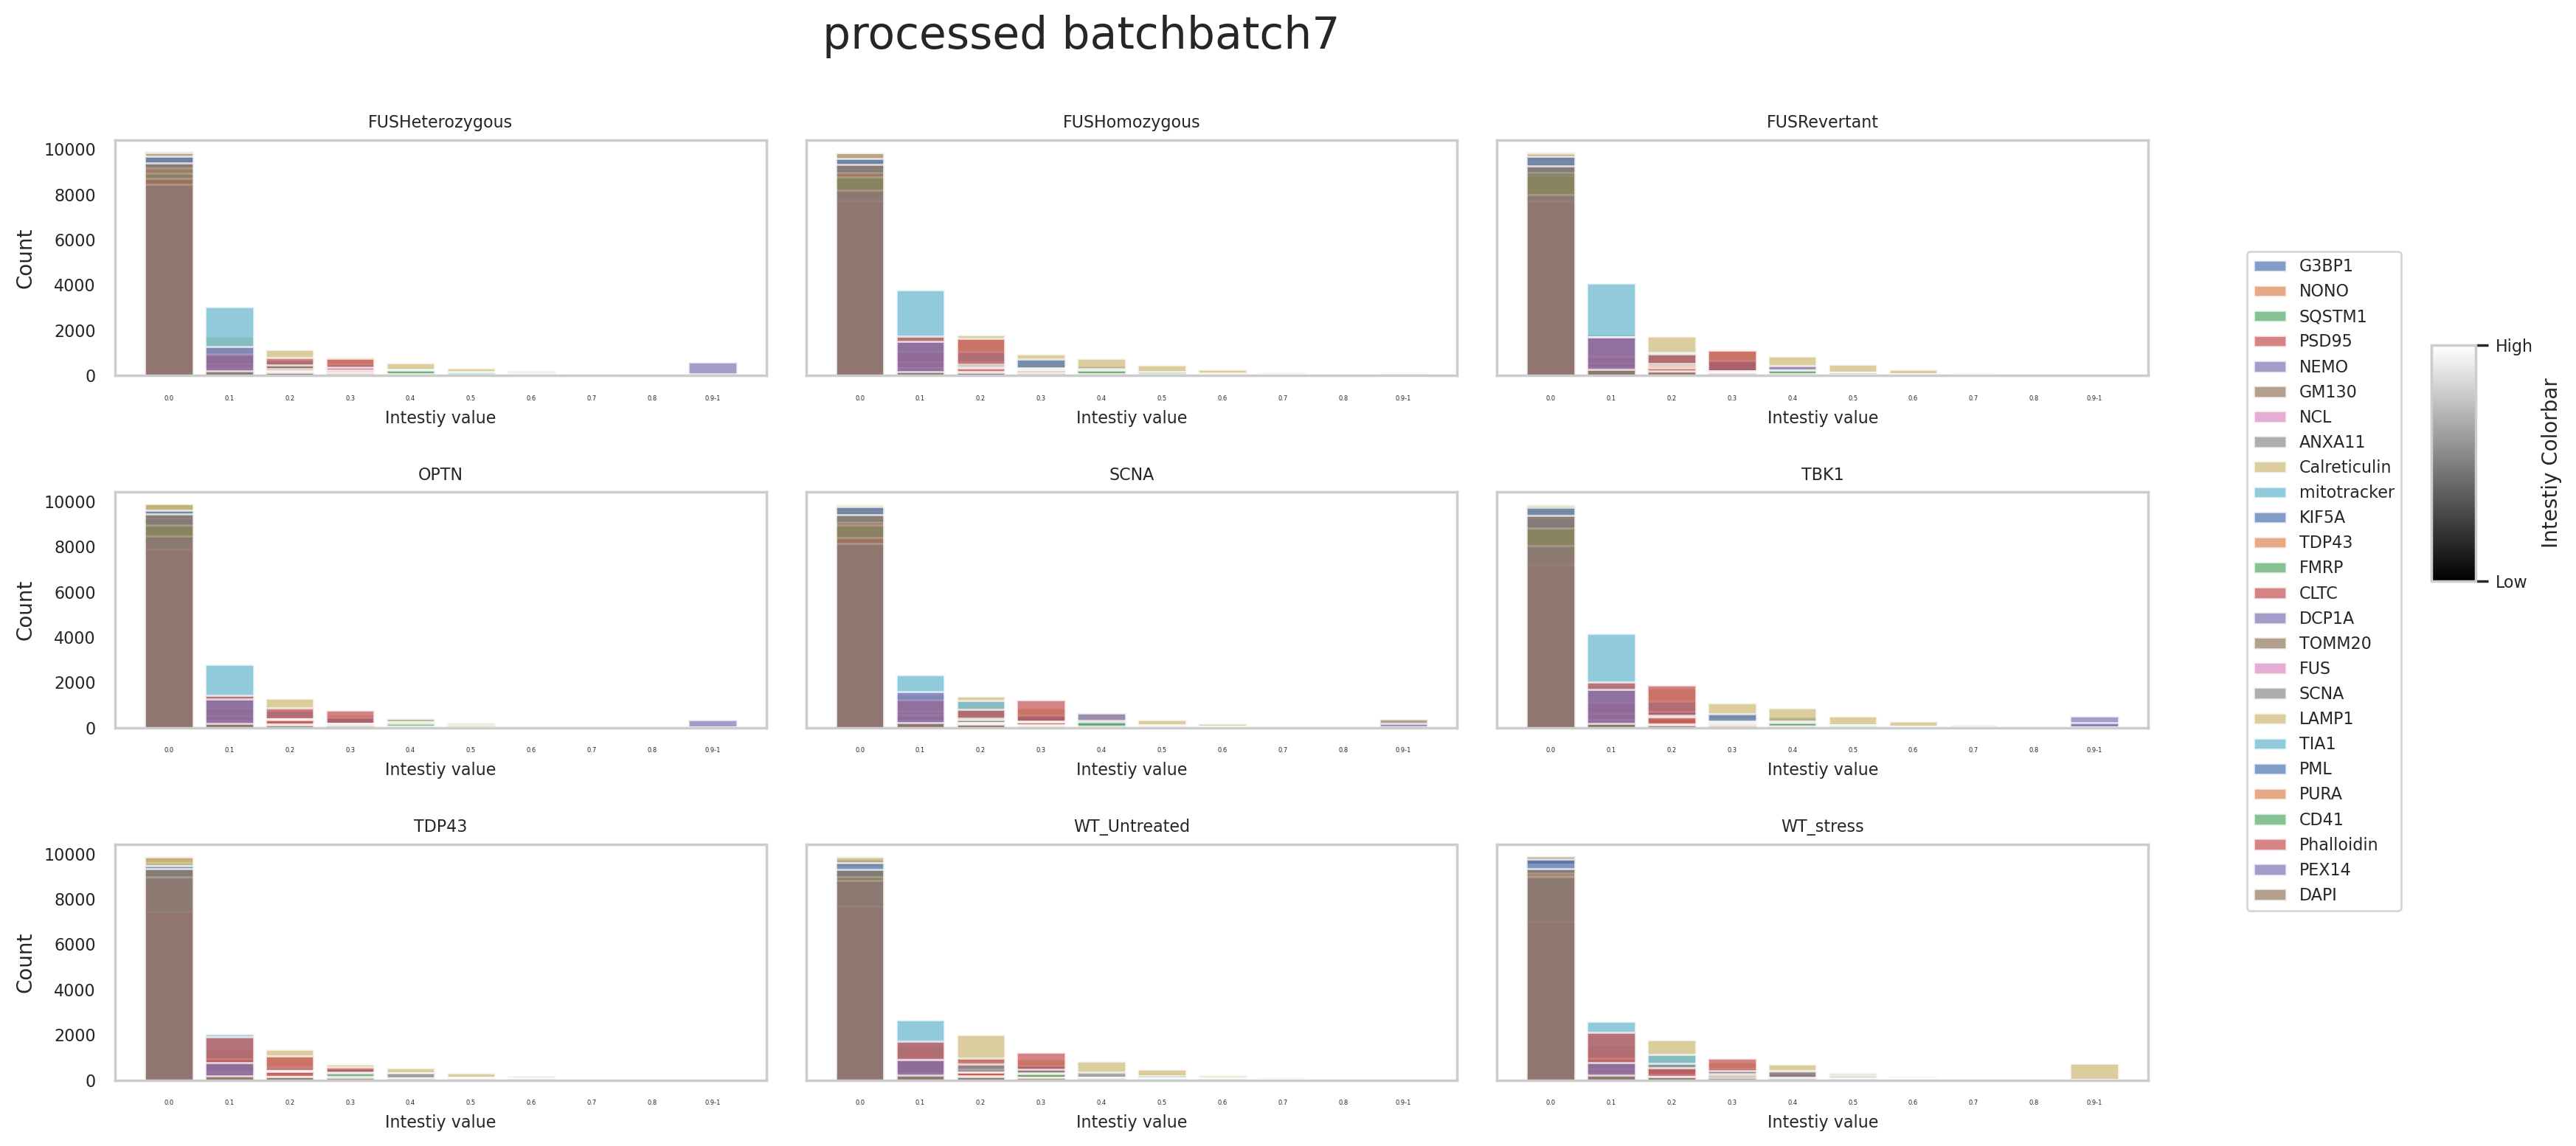

In [86]:
for batch in batches:
    if batch=='batch9' or batch=='batch3' or '16_bit' in batch:
        continue
    print(batch)
    #batch_num = batch.replace('batch',"")
    run_calc_hist_new(batch,cell_lines_for_disp, markers, sample_size_per_markers=10)
    print("="*30)

In [82]:
batches

['batch3']

In [15]:
print(os.system('pwd'))
print("Done!")

/home/labs/hornsteinlab/Collaboration/MOmaps
0
Done!


In [18]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis_Noam.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/cell_count_stats_analysis_Noam.ipynb to html
[NbConvertApp] Writing 17628462 bytes to src/preprocessing/notebooks/cell_count_stats_analysis_Noam.html


0